In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import os
import json
import re
from keras.models import load_model

C:\Users\Vidon\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\Vidon\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# read data from csv file

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [3]:
file = 'fake.csv'
df = pd.read_csv(file)

In [4]:
# unqiue types 
u_type = df['type'].unique()
print(len(u_type))

8


In [5]:
# count in each type 
count_type = df['type'].value_counts()
print(count_type)

bs            11492
bias            443
conspiracy      430
hate            246
satire          146
state           121
junksci         102
fake             19
Name: type, dtype: int64


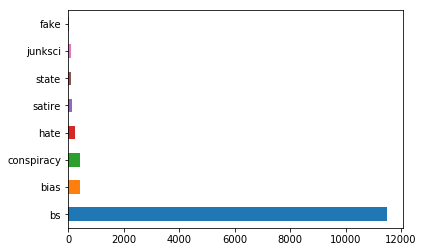

In [6]:
# draw the count result
count_type.plot(kind='barh')

# which website has fake news

In [7]:
fake_news_df = df[df['type'] != 'bs']
fake_news_website = fake_news_df['site_url'].unique()

In [8]:
fake_news_df.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [9]:
fake_news_website = fake_news_website.tolist()

In [10]:
print(type(fake_news_website))
print(len(fake_news_website))

<class 'list'>
27


In [11]:
# get the fake news website and title of these fake news
fake_news_title = fake_news_df[['text']]

In [12]:
fake_news_title.head()
print(len(fake_news_title))

1507


# add news content into a list 

In [13]:
fake_news_content_from_csv = fake_news_title['text'].tolist()


In [14]:
print(fake_news_content_from_csv[0])

Print They should pay all the back all the money plus interest. The entire family and everyone who came in with them need to be deported asap. Why did it take two years to bust them? 
Here we go again …another group stealing from the government and taxpayers! A group of Somalis stole over four million in government benefits over just 10 months! 
We’ve reported on numerous cases like this one where the Muslim refugees/immigrants commit fraud by scamming our system…It’s way out of control! More Related


In [15]:
fake_news_content_from_csv_str = []
for i in range(0,len(fake_news_content_from_csv)):
    #print(type(fake_news_content_from_csv[i]))
    if(isinstance(fake_news_content_from_csv[i], str)):
        fake_news_content_from_csv_str.append(fake_news_content_from_csv[i])
    

In [16]:
a = fake_news_content_from_csv[1111]
new_content_token_csv = re.sub(r'[^\w]', ' ', a).lower().split()

In [17]:
print(new_content_token_csv) #some of the news_content_token_csv is float type

['breitbart', 'october', '26', '2016', 'a', 'syrian', 'christian', 'mother', 'shared', 'her', 'story', 'of', 'escaping', 'the', 'islamic', 'state', 'terrorist', 'group', 'in', 'a', 'suburb', 'of', 'damascus', 'while', 'losing', 'her', 'son', 'george', 'after', 'he', 'refused', 'to', 'identify', 'himself', 'to', 'the', 'terrorists', 'by', 'a', 'muslim', 'name', 'the', 'woman', 'alice', 'assaf', 'said', 'that', 'she', 'had', 'heard', 'that', 'her', 'son', 'who', 'was', 'beaten', 'and', 'shot', 'to', 'death', 'was', 'spared', 'a', 'much', 'worse', 'fate', 'being', 'baked', 'in', 'the', 'ovens', 'of', 'the', 'local', 'bakery', 'or', 'kneaded', 'to', 'death', 'in', 'the', 'bakery', 's', 'industrial', 'sized', 'mixer', 'assaf', 'told', 'her', 'story', 'to', 'roads', 'of', 'success', 'a', 'human', 'rights', 'ngo', 'with', 'a', 'focus', 'on', 'the', 'rights', 'of', 'women', 'and', 'christians', 'in', 'the', 'middle', 'east', 'the', 'group', 'has', 'provided', 'testimony', 'of', 'the', 'plight'

In [18]:
# clean the data
news_content_all_csv= []
for i in range (0,len(fake_news_content_from_csv_str)):
    new_content_token_csv = re.sub(r'[^\w]', ' ', fake_news_content_from_csv_str[i]).lower().split()
    new_content_token_csv = [ word for word in new_content_token_csv if word not in stopwords.words('english')]
    news_content_all_csv.append(new_content_token_csv)


In [19]:
print(type(fake_news_content_from_csv))
print(len(fake_news_content_from_csv))
print(type(fake_news_content_from_csv[0]))

<class 'list'>
1507
<class 'str'>


# extract news content from csv files

In [20]:
print(news_content_all_csv[0])
print(news_content_all_csv[1333])

['print', 'pay', 'back', 'money', 'plus', 'interest', 'entire', 'family', 'everyone', 'came', 'need', 'deported', 'asap', 'take', 'two', 'years', 'bust', 'go', 'another', 'group', 'stealing', 'government', 'taxpayers', 'group', 'somalis', 'stole', 'four', 'million', 'government', 'benefits', '10', 'months', 'reported', 'numerous', 'cases', 'like', 'one', 'muslim', 'refugees', 'immigrants', 'commit', 'fraud', 'scamming', 'system', 'way', 'control', 'related']
['josh', 'stop', 'talking', 'sit', 'american', 'people', 'fed', 'spewing', 'lies', 'coming', 'administration', 'destruction', 'country', 'come', 'end', 'people', 'spoken', 'time', 'change', 'long', 'time', 'coming', 'trump', 'would', 'say', 'time', 'drain', 'swamp']


In [21]:
# change to a list of string
news_content_string_csv = [' '.join(x) for x in news_content_all_csv]

In [22]:
print(news_content_string_csv[0:2])

['print pay back money plus interest entire family everyone came need deported asap take two years bust go another group stealing government taxpayers group somalis stole four million government benefits 10 months reported numerous cases like one muslim refugees immigrants commit fraud scamming system way control related', 'attorney general loretta lynch plead fifth barracuda brigade 2016 10 28 print administration blocking congressional probe cash payments iran course needs plead 5th either recall refuses answer plain deflects question straight corruption finest 100percentfedup com talk covering ass loretta lynch plead fifth avoid incriminating payments iran corrupt core attorney general loretta lynch declining comply investigation leading members congress obama administration secret efforts send iran 1 7 billion cash earlier year prompting accusations lynch pleaded fifth amendment avoid incriminating payments according lawmakers communications exclusively obtained washington free bea

# label the news from csv files, all news are fake

In [23]:
# create a list to hold the response variable fake and real (1 and 0), the first 91 is fake and last 91 is real
fake_y_csv = [1] * len(news_content_string_csv)

# one hot encode the output variable
news_Y_csv = np.array (fake_y_csv)
print(type(news_Y_csv))

<class 'numpy.ndarray'>


In [24]:
print(news_Y_csv.shape)

(1461,)


# read all json files from different folder

In [25]:
# read real
myList = []
directory = 'BuzzFeed/FakeNewsContent'
file_names = os.listdir(directory)
cleaned_file_name = [f for f in file_names if f.endswith('.json')]
#for i, filename in zip(range(1),cleaned_file_name):
for filename in cleaned_file_name:   
    with open(os.path.join(directory,filename),'r',encoding="utf8") as myfile:
        #print(filename)
        data = json.load(myfile) 
        myList.append(data)
        
# read fake
myList_real = []
my_df_real  = pd.DataFrame()
directory_real = 'BuzzFeed/RealNewsContent'
file_names_real = os.listdir(directory_real)
cleaned_file_name_real = [f for f in file_names_real if f.endswith('.json')]
#for i, filename in zip(range(1),cleaned_file_name):
for filename in cleaned_file_name_real:   
    with open(os.path.join(directory_real,filename),'r',encoding="utf8") as myfile:
        #print(filename)
        data = json.load(myfile) 
        myList_real.append(data)
        
# read fake news
myList_fake = []
my_df  = pd.DataFrame()
directory_fake = 'PolitiFact/FakeNewsContent'
file_names_fake = os.listdir(directory_fake)
cleaned_file_name_fake = [f for f in file_names_fake if f.endswith('.json')]
#for i, filename in zip(range(1),cleaned_file_name):
for filename in cleaned_file_name_fake:   
    with open(os.path.join(directory_fake,filename),'r',encoding="utf8") as myfile:
        #print(filename)
        data = json.load(myfile) 
        myList_fake.append(data)
        
# read good news
myList_real_p = []
directory_real_p = 'PolitiFact/RealNewsContent'
file_names_real_p = os.listdir(directory_real_p)
cleaned_file_name_real_p = [f for f in file_names_real_p if f.endswith('.json')]
#for i, filename in zip(range(1),cleaned_file_name):
for filename in cleaned_file_name_real_p:   
    with open(os.path.join(directory_real_p,filename),'r',encoding="utf8") as myfile:
        #print(filename)
        data = json.load(myfile) 
        myList_real_p.append(data)

# append all file together (fake and real) from both json file

In [109]:
news_list = myList + myList_fake + myList_real + myList_real_p 

In [110]:
print(len(news_list))

422


# extract news content from json file

In [111]:

# news_content_all has already delete the stopwards.words
import re 
news_content_all = []
for i in range (0,len(news_list)): # i from 0 to 90
    #print(news_dict)
    per_new_text= []
    news_dict = news_list[i]
    news_content = news_dict['text']
    new_content_token = re.sub(r'[^\w]', ' ', news_content).lower().split()
    new_content_token = [ word for word in new_content_token if word not in stopwords.words('english')]
    news_content_all.append(new_content_token)


In [112]:

print(len(news_content_all))
print(len(news_content_all[0]))
print(len(news_content_all[90]))
print("the type of news_content_all is ", type(news_content_all))
print("the type fo news content all [0] is", type(news_content_all[0]))
print(news_content_all[0][0])
# this news_content_all is a list of list 


422
300
232
the type of news_content_all is  <class 'list'>
the type fo news content all [0] is <class 'list'>
woke


In [113]:
# make a list of list to a list of string, so we can use in the Tokenizer part
news_content_string = [' '.join(x) for x in news_content_all]

In [114]:
print(type(news_content_string))
print(news_content_string[0])

<class 'list'>
woke morning find variation headline splashed news feed bill clinton natural foundation donors seek favors google naturally reaction oh bill clinton damage wife campaign course headline sounds really really awful plays right idea clinton foundation pay play like donald trump saying along unfortunately takes reading beyond headlines something people find real story real story pay play natural people political allies personal friends call ask things trusted state department anything clinton told npr interview aired monday morning source cnn words people ask favors certainly mean get leaked emails shown clinton foundation donors gotten meetings clinton others turned zero evidence pay play words people might asked favors evidence got let talk foundation media like mention trump foundation trump given foundation since 2008 collect money others though gives name also takes charity allegedly buys things like oil paintings football helmets charity money new york attorney general

In [115]:
# another way to create news_content all, a list of string

In [116]:
'''
# news_content_all doesn't delete the stopwards words
import re 
news_content_all = []
for i in range (0,len(news_list)): # i from 0 to 90
    per_new_text= []
    news_dict = news_list[i]
    news_content = news_dict['text']
    new_content_token = re.sub(r'[^\w]', ' ', news_content).lower()
    news_content_all.append(new_content_token)
'''

"\n# news_content_all doesn't delete the stopwards words\nimport re \nnews_content_all = []\nfor i in range (0,len(news_list)): # i from 0 to 90\n    per_new_text= []\n    news_dict = news_list[i]\n    news_content = news_dict['text']\n    new_content_token = re.sub(r'[^\\w]', ' ', news_content).lower()\n    news_content_all.append(new_content_token)\n"

In [117]:
'''
print(news_content_all[0])
print(type(news_content_all[0]))
print(type(news_content_all))
'''

'\nprint(news_content_all[0])\nprint(type(news_content_all[0]))\nprint(type(news_content_all))\n'

# count the word frequency in the entire news and save all words we want to keep , delete words that we think is not important

In [118]:
# news_content_string is a list of string, that are used for embedding 
# news_content_all is a list of list 
# make nested list to flat list and then count frequency 
from collections import Counter
import itertools
flatList = list(itertools.chain.from_iterable(news_content_all))
counts = Counter(flatList)


In [119]:
print(type(counts))
print(len(counts))

<class 'collections.Counter'>
15605


In [120]:
count = 0
for key, cnts in list(counts.items()):   
    if cnts > 5:
        count = count + 1
print(count) 

'''
3798 word frequent is greater than 5. 
'''

3798


'\n3798 word frequent is greater than 5. \n'

# create response variable y fake is 1 and real is 0, y is a list

In [184]:
# create a list to hold the response variable fake and real (1 and 0), the first 91 is fake and last 91 is real
fake_y = [1] * (91 + 120)
real_y = [0]* (91+120)
fake_real_label = []
fake_real_label.extend(fake_y)
fake_real_label.extend(real_y)
print(len(fake_real_label))
print(type(fake_real_label))

# one hot encode the output variable
news_Y = np.array (fake_real_label)
news_Y = np.concatenate([news_Y_csv,news_Y])
#news_Y.extend(news_Y_csv)
print(type(news_Y))
print(news_Y.shape)

422
<class 'list'>
<class 'numpy.ndarray'>
(1883,)


In [185]:
# add news_content_string and news_content_string_csv together, label should be all fake and real
docs = news_content_string_csv + news_content_string 
#docs = news_content_string 

In [186]:
docs[0]

'print pay back money plus interest entire family everyone came need deported asap take two years bust go another group stealing government taxpayers group somalis stole four million government benefits 10 months reported numerous cases like one muslim refugees immigrants commit fraud scamming system way control related'

In [187]:
print("length of news:", len(docs))
print("type of news:", type(docs))

print("length of label:", len(news_Y))
print("type of news:", type(news_Y))

length of news: 1883
type of news: <class 'list'>
length of label: 1883
type of news: <class 'numpy.ndarray'>


# import package about keras

In [188]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding

# create the tokenizer Part and padding words to integer and then to vector

In [189]:
# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)


In [190]:
news_embbeding  = t.texts_to_sequences(docs)

'''
# 把词转换为编号，词的编号根据词频设定，频率越大，编号越小
'''

'\n# 把词转换为编号，词的编号根据词频设定，频率越大，编号越小\n'

In [191]:
print(type(news_embbeding))
print(len(news_embbeding[0]))
print(type(news_embbeding[0]))
print(news_embbeding[1])

<class 'list'>
47
<class 'list'>
[535, 197, 2573, 871, 8571, 3484, 13791, 6857, 18, 101, 665, 946, 255, 3707, 1044, 2404, 1295, 2694, 348, 261, 415, 8571, 9428, 334, 3942, 3367, 657, 3277, 10502, 251, 1296, 827, 10503, 11875, 22, 436, 3032, 2057, 2573, 871, 8571, 3484, 920, 7891, 2694, 348, 993, 2167, 535, 197, 2573, 871, 6079, 5472, 153, 745, 393, 424, 20, 255, 728, 631, 1269, 348, 88, 361, 746, 1295, 401, 62, 4582, 2217, 871, 5241, 3484, 1849, 920, 7891, 2694, 72, 2266, 1906, 3943, 2624, 129, 131, 6080, 1143, 3821, 2058, 1045, 7892, 1238, 1297, 10504, 1045, 16551, 2948, 2819, 871, 73, 1057, 605, 1295, 3708, 348, 1672, 2104, 570, 888, 689, 2218, 535, 197, 1628, 1205, 1553, 871, 2267, 3033, 657, 605, 6081, 2266, 5756, 1629, 10505, 1415, 1295, 3708, 4402, 7334, 438, 2508, 11876, 233, 34, 8572, 348, 689, 535, 197, 172, 5473, 1320, 280, 871, 2105, 2018, 8571, 3484, 2949, 2268, 6082, 1079, 550, 1907, 1295, 33, 6858, 19, 8573, 439, 2058, 10504, 304, 658, 695, 499, 871, 403]


In [192]:
max_length = 426
padded_docs = pad_sequences(news_embbeding, maxlen=max_length) 


In [193]:
padded_docs

array([[    0,     0,     0, ...,    36,   211,   403],
       [    0,     0,     0, ...,   499,   871,   403],
       [    0,     0,     0, ...,  8575,  1058,   403],
       ...,
       [    3, 16537, 21600, ...,   239,  4864,  2584],
       [    0,     0,     0, ...,  9148,   585,   276],
       [    0,     0,     0, ...,   372,   773,  1990]])

In [161]:
'''
pad_sequences is a function that can make different length of news become same length, if the length of a news exceed 
the maxlen, then this function will make the words that exceed max length to 0 and if the length of a news is less than
the maxlen, then this function will make the different length of words between current length and max length to 0. 

So, how to set the max length? how to determine what element should be left or delete? 

before doing pad_sequences, we decide to count frequency of words in all news then rank them. Save the words with 
highest and useful words. (except I , am , and, my)

Saving the words that we want to keep to a new trainX and redo the new embedding. 


By the way, the embedding part is translate each word to a unqiue integer. 
'''

'\npad_sequences is a function that can make different length of news become same length, if the length of a news exceed \nthe maxlen, then this function will make the words that exceed max length to 0 and if the length of a news is less than\nthe maxlen, then this function will make the different length of words between current length and max length to 0. \n\nSo, how to set the max length? how to determine what element should be left or delete? \n\nbefore doing pad_sequences, we decide to count frequency of words in all news then rank them. Save the words with \nhighest and useful words. (except I , am , and, my)\n\nSaving the words that we want to keep to a new trainX and redo the new embedding. \n\n\nBy the way, the embedding part is translate each word to a unqiue integer. \n'

In [162]:
# check how many words appears more than 5 times, 
count = 0
for key, cnts in list(counts.items()):   
    if cnts > 30:
        count = count + 1
print(count) 

# greater than 20, 1213 words
# greater than 30, 795 words
# greater than 50, 426 words

795


In [163]:
'''
cannot sort it, because after sort the order of words will change 
'''

'\ncannot sort it, because after sort the order of words will change \n'

In [164]:
# pad_sequences process based on rank
# Example to sort the first element
e1 = news_embbeding[0]
print(sorted(e1,key = int))


[4, 9, 35, 36, 38, 49, 50, 50, 54, 74, 83, 94, 98, 101, 126, 128, 141, 141, 179, 185, 211, 220, 244, 282, 317, 354, 392, 403, 569, 616, 810, 870, 912, 933, 946, 992, 1394, 1601, 2572, 3594, 4236, 4401, 7890, 9427, 16549, 16550, 21669]


In [165]:
length = [len(x) for x in news_embbeding]
import matplotlib.pyplot as plt
%matplotlib inline



(array([1.511e+03, 2.790e+02, 6.500e+01, 1.500e+01, 5.000e+00, 2.000e+00,
        1.000e+00, 4.000e+00, 0.000e+00, 1.000e+00]),
 array([   0. ,  417.2,  834.4, 1251.6, 1668.8, 2086. , 2503.2, 2920.4,
        3337.6, 3754.8, 4172. ]),
 <a list of 10 Patch objects>)

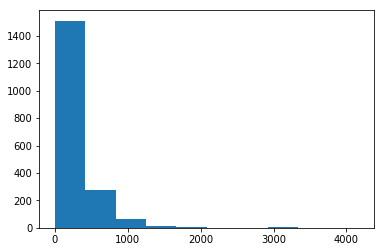

In [166]:
plt.hist(length)

In [194]:
length = sorted(length)
length

index = int(len(length)* 0.97) # 1171 cover 97% of words
max_length = length[index]
print(max_length)

987


In [195]:

padded_docs = pad_sequences(news_embbeding, maxlen=max_length, padding = 'post') 

# choose save the words which frequent greater than 50?
# padding: String, 'pre' or 'post': pad either before or after each sequence.

In [196]:
print(padded_docs[0:10])

[[ 946  392   49 ...    0    0    0]
 [ 535  197 2573 ...    0    0    0]
 [ 576   19  464 ...    0    0    0]
 ...
 [ 653 4087 1110 ...    0    0    0]
 [3827    3 1977 ...    0    0    0]
 [  66    5 1630 ...    0    0    0]]


In [197]:
len(padded_docs)

1883

# use glove to do word embedding

In [198]:
# load the whole embedding into memory
from numpy import array
from numpy import asarray
embeddings_index = dict()
file = "glove/glove.6B.50d.txt"
f = open(file,'rb')
for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [172]:
'''
Next, we need to create a matrix of one embedding for each word in the training dataset. 
We can do that by enumerating all unique words in the Tokenizer.word_index and locating the embedding weight 
vector from the loaded GloVe embedding.
The result is a matrix of weights only for words we will see during training.
'''
vocab_size = len(t.word_index) + 1
from numpy import zeros
embedding_matrix = zeros((vocab_size, 50))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [173]:
print(len(t.word_index)) #  how many words in the entire words
print(type(t.word_index))

33893
<class 'dict'>


In [174]:
print(embedding_matrix)
print(vocab_size)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
33894


In [175]:
#print(t.word_index)

value = [v for key,v in t.word_index.items()]
value.count(1)

1

# using training data to train model

# split training , validation and testing data

In [199]:
print(len(padded_docs))
print(len(news_Y))

1883
1883


In [200]:
from sklearn.model_selection import train_test_split
validation_size = 0.2
seed = 3
# write your code to complete following line

train_X, test_X = train_test_split(padded_docs,  test_size=validation_size, random_state=seed)
train_y, test_y = train_test_split(news_Y,  test_size=validation_size, random_state=seed)

In [201]:
#print(len(train_X[0]))
#print(len(train_X[1]))
print('the training x is', len(train_X))
print('the training y is', len(train_y))
print('the testing x is', len(test_X))
print('the testing y is', len(test_y))


print(train_y[0:20])
print(test_X[0:20])

the training x is 1506
the training y is 1506
the testing x is 377
the testing y is 377
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
[[ 207   17   18 ...    0    0    0]
 [ 114   97  821 ...    0    0    0]
 [  11   44   28 ...    0    0    0]
 ...
 [ 383 6740  383 ...    0    0    0]
 [   1 9091   20 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


# solve data imbalance problem -- Oversampling

In [202]:
from imblearn.over_sampling import SMOTE

In [203]:
print("Number transactions X_train dataset: ", train_X.shape)
print("Number transactions y_train dataset: ", train_y.shape)
print("Number transactions X_test dataset: ", test_X.shape)
print("Number transactions y_test dataset: ", test_y.shape)

Number transactions X_train dataset:  (1506, 987)
Number transactions y_train dataset:  (1506,)
Number transactions X_test dataset:  (377, 987)
Number transactions y_test dataset:  (377,)


In [204]:
print("Before OverSampling, counts of label '1': {}".format(sum(train_y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(train_y==0)))

Before OverSampling, counts of label '1': 1340
Before OverSampling, counts of label '0': 166 



In [205]:
# oversample on training set
sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_sample(train_X, train_y)

In [206]:
#print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
#print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

# How to use tensorflow to handle class imbalance? (88% of data are fake) -- the mothod below looks like dosen't works on LSTM
fd/## add class weights to the loss function

In [207]:
'''
# function to weighted the loss of predicting the 0. deal with the data imbalance
from keras import backend as K
from __future__ import print_function
import numpy as np
#np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
import keras.backend as K
from itertools import product


from keras import backend as K
def weighted_categorical_crossentropy(weights):
    """
    A weighted version of keras.objectives.categorical_crossentropy
        `
    Variables:
        weights: numpy array of shape (C,) where C is the number of classes
    
    Usage:
        weights = np.array([0.5,2,10]) # Class one at 0.5, class 2 twice the normal weights, class 3 10x.
        loss = weighted_categorical_crossentropy(weights)
        model.compile(loss=loss,optimizer='adam')
    """
    
    weights = K.variable(weights)
        
    def loss(y_true, y_pred):
        # scale predictions so that the class probas of each sample sum to 1
        y_pred /= K.sum(y_pred, axis=-1, keepdims=True)
        # clip to prevent NaN's and Inf's
        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
        # calc
        loss = y_true * K.log(y_pred) * weights
        loss = -K.sum(loss, -1)
        return loss
    
    return loss
'''

'\n# function to weighted the loss of predicting the 0. deal with the data imbalance\nfrom keras import backend as K\nfrom __future__ import print_function\nimport numpy as np\n#np.random.seed(1337)  # for reproducibility\n\nfrom keras.datasets import mnist\nfrom keras.models import Sequential\nfrom keras.layers.core import Dense, Dropout, Activation\nfrom keras.optimizers import SGD, Adam, RMSprop\nfrom keras.utils import np_utils\nimport keras.backend as K\nfrom itertools import product\n\n\nfrom keras import backend as K\ndef weighted_categorical_crossentropy(weights):\n    """\n    A weighted version of keras.objectives.categorical_crossentropy\n        `\n    Variables:\n        weights: numpy array of shape (C,) where C is the number of classes\n    \n    Usage:\n        weights = np.array([0.5,2,10]) # Class one at 0.5, class 2 twice the normal weights, class 3 10x.\n        loss = weighted_categorical_crossentropy(weights)\n        model.compile(loss=loss,optimizer=\'adam\')\n 

# Model

In [208]:
from keras import optimizers
model = Sequential()
# add embedding layers
model.add(Embedding(vocab_size, 50,weights=[embedding_matrix], input_length=max_length)) # length of dictionary, dim output

layer = model.layers[0]
layer.trainable = False

batchSize = 128
#batchSize = 1  # should be 128
weights = np.array([0.5,8])

#opt = optimizers.SGD(lr = 0.01)

model.add(LSTM(40, input_shape =(None,50)))  #should be 40
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
#model.compile(loss=weighted_categorical_crossentropy(weights), optimizer='adam', metrics=['accuracy'])


# fit model and save model

In [210]:
hist = model.fit(x_train_res, y_train_res, batch_size=batchSize, validation_data= (test_X, test_y), epochs=50)
model.save('finalModel')

Train on 2680 samples, validate on 377 samples
Epoch 1/50
2680/2680 [==============================] - 33s 12ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6927 - val_acc: 0.8806
Epoch 2/50
 768/2680 [=======>......................] - ETA: 26s - loss: 0.6932 - acc: 0.4961

KeyboardInterrupt: 

In [211]:
hist.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [212]:
loss = hist.history['loss']
acc = hist.history['acc']
val_acc = hist.history['val_acc']
val_loss = hist.history['val_loss']

In [213]:
import matplotlib.pyplot as plt

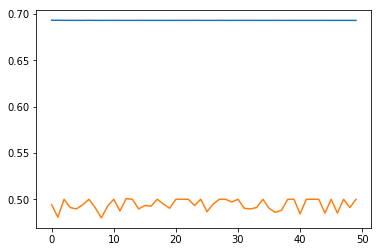

In [214]:
plt.plot(loss)
plt.plot(acc)

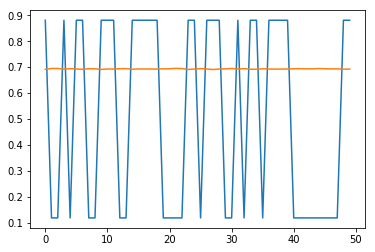

In [215]:
plt.plot(val_acc)
plt.plot(val_loss)

# commen the next cell's code (in order to do API)

In [216]:
# in order to do the next part, just select 100 news form x_train and y_train, and 50 news
# from test_x and test_y
#x_train_100 = train_X[0:50]
#y_train_100 = train_y[0:50]
#test_X_100 = test_X [0:10]
#test_y_100 = test_y [0:10]

#model.fit(x_train_100, y_train_100, batch_size=batchSize, validation_data= (test_X_100, test_y_100), epochs=1)

#model.save('finalModel')

# read the url and make it to vector

In [217]:
# import the necessary packages
from keras.applications import ResNet50
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils
from PIL import Image
import numpy as np
import flask
import io
import requests
from bs4 import BeautifulSoup

In [218]:
url = 'https://www.bbc.com/news/world-middle-east-45128367'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
#soup.prettify()

table = soup.find("div", {"class":"story-body__inner"}).findAll('p')

article_text = ''
for element in table:
    article_text += ''.join(element.findAll(text = True))

article_text = re.sub(r'[^\w]', ' ', article_text)
article_text 

'At least 29 children have been killed and 30 wounded in a Saudi led coalition air strike in Yemen  the International Committee of the Red Cross says The children were travelling on a bus that was hit at a market in Dahyan  in the northern province of Saada  The health ministry run by the rebel Houthi movement put the death toll at 43  and said 61 people were wounded  The coalition  which is backing Yemen s government in a war with the Houthis  said its actions were  legitimate  It insists it never deliberately targets civilians  but human rights groups have accused it of bombing markets  schools  hospitals and residential areas Meanwhile the new UN special envoy to Yemen  former British diplomat Martin Griffiths  is planning to invite the warring parties to Geneva in September to discuss a framework for negotiations He told the BBC s Lyse Doucet that if the conflict is left unresolved  Yemen could collapse and the international community could be looking at  Syria plus  in the years t

In [219]:
#t = Tokenizer()
# fit the tokenizer on the documents
#t.fit_on_texts(article_text)
    
news_embbeding_predict  = t.texts_to_sequences(article_text)

padded_docs_p = pad_sequences(news_embbeding_predict, maxlen=max_length) 
    
padded_docs_p = pad_sequences(news_embbeding_predict, maxlen=987, padding = 'post') 
    
#vocab_size = len(t.word_index) + 1
#from numpy import zeros
#embedding_matrix_p = zeros((vocab_size, 50))
#for word, i in t.word_index.items():
#    embedding_vector_p = embeddings_index.get(word)
#    if embedding_vector_p is not None:
#        embedding_matrix_p[i] = embedding_vector_p

In [220]:
print(train_X.shape)
print(padded_docs_p[0:10])




(1506, 987)
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [125   0   0 ...   0   0   0]]


In [221]:
model = load_model('finalModel')
#model.add(Embedding(vocab_size, 50,weights=[embedding_matrix_p], input_length=max_length)) 

preds = model.predict(padded_docs_p)



In [222]:
preds

array([[0.50051653],
       [0.50051653],
       [0.50051653],
       ...,
       [0.50051653],
       [0.50051653],
       [0.50051653]], dtype=float32)

# this is the actual code will be used in this project  --- train the model

In [ ]:
# fit the model
#model.fit(train_X, train_y, batch_size=batchSize, validation_data= (test_X, test_y), epochs=50)
#model.fit(train_X, train_y, batch_size=batchSize, validation_data= (test_X, test_y), epochs=1)
######### running this line of code 
#model.fit(x_train_res, y_train_res, batch_size=batchSize, validation_data= (test_X, test_y), epochs=1)

# evaluate the model
#loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)